<a href="https://colab.research.google.com/github/CGuzman99/Data-analysis-and-machine-learning/blob/main/DCN-IMDB/NN_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Summary

In this project a proble of two-class classification, or binary classification, using machine learning is solved. A neural network is trained to classify movie reviews as positive or negative, based on the text content of the reviews, using Keras library.

#Introduction

The binary classification is one of the most widely applied kind of machine learning problems. Classifying movie reviews as positive or negative based on the text content of the reviews falls on this category and we can use deep learning models to solve it. Here I will implement a solution to this problem using machine learnig techniques.

To develop the neural network I'm using Keras and the data will be taken from the IMDB dataset which comes packaged with keras. Keras is a model-level library, providing high-level building blocks for developing deep-learnig models. The IMDB dataset is a set of 50,000 highly polarized reviews from the Internet Movie Database, that are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

#Methodology

##Importing the data

To construct the model and getting the data I'm using the keras library. The first step is to import the data to work with. The argument num_words=10000 means we'll only keep the top 10,000 most frequently ocurring words in the training data. The variables train_data and test_data are lists of reviews, and each review is a list of word indices that are encoding a sequence of words. The variables train_labels and test_labels are lists of 0s and 1s, where 0 means negative and 1 positive.

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


##Preparing the data

Before passing the data to our model we have to prepare it, which means we have to turn the lists into tensors. I'm using one-hot encoding to turn the lists into vectors of 0s and 1s.

In [ ]:
# Encoding the integer sequences into a binary matrix

import numpy as np

def vectorize_sequences(sequences, dimension=10000) :
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences) :
    results[i, sequence] = 1. # Sets specific indices of results[i] to 1s
  return results

x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized test data

y_train = np.asarray(train_labels).astype('float32') # Vectorized train labels
y_test = np.asarray(test_labels).astype('float32') # Vectorized test labels

##Construction of the model and training

For the model I'll use a simple stack of two fully connected layers with relu activations and a final layer with sigmoid activation. For the two initial Dense layers we are using 16 hidden units. This means the wight matrix of each layer will have shape (input_dimension, 16). In the final layer we use the sigmoid activation to output a probability, i.e., a value between 0 and 1 indicating how likely the review is to be positive. Because this is a binary classification problem I am using binary crossentropy as the loss function and rmsprop as the optimizer.

In [ ]:
# The model definition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Compiling the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

I am setting a subset of the training data as a validation set for the model to compare the results with the rest of the training set and refine the model before passing the test set.

In [ ]:
# Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# Training the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc']
              )

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                    )

#Results

Now we'll see the results of the model. To create the graphics I am using matplotlib.

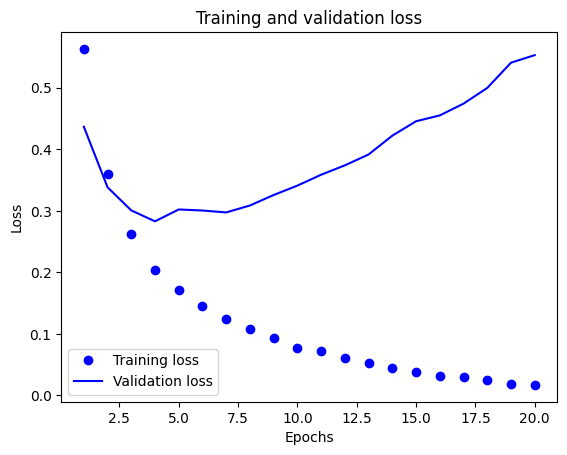

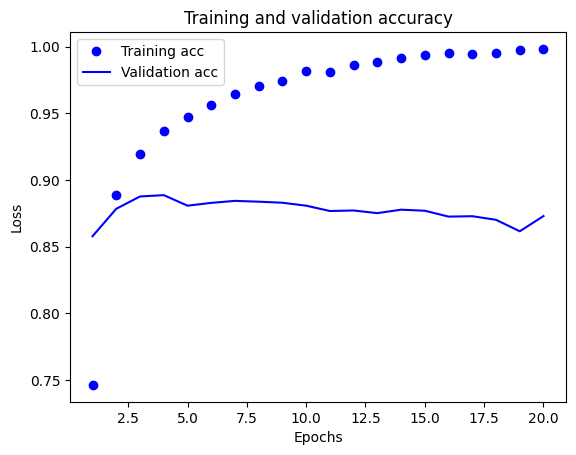

In [ ]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Conclusions

As we can see in the previous section, the model starts to overfit after 4 epochs, reaching a peak for the validation accuracy close to 0.88, or the 88%. Now we can train a new model with the whole training set for four epochs and test it with the test samples.

In [ ]:
# Retraining a model

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.4694 - accuracy: 0.8112
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2797 - accuracy: 0.9025
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2209 - accuracy: 0.9210
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2817 - accuracy: 0.8868


In [ ]:
results

[0.28165048360824585, 0.8867599964141846]

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.19282594],
       [0.9996261 ],
       [0.8717102 ],
       ...,
       [0.08282143],
       [0.08208972],
       [0.50112903]], dtype=float32)

This new model has an accuracy of 88% and is a good aproach to solve the problem of classification of movie reviews, even though there are samples where the model doesn't have a good performance classifying the review and predicting a value close to 0.5. To try to improve the performance of the model we could use some techniques to prevent overfitting, like using dropout or l2 regularization, or use another approach changing the type of model to a Recurrent Neural Network or a Convolutional Network.